References:

https://github.com/yunjey/pytorch-tutorial 

https://medium.com/coinmonks/create-a-neural-network-in-pytorch-and-make-your-life-simpler-ec5367895199

In [28]:
import torch, torch.nn as nn, copy, timeit, numpy.random as npr, numpy as np
from torch.distributions.bernoulli import Bernoulli 
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import plot, show, legend
from scipy.stats import uniform

#### Define number of layers and number of nodes per layer:

In [68]:
n_in = 1
n_h1 = 5
n_out = 2

#### Define model:

In [69]:
model = nn.Sequential(nn.Linear(n_in, n_h1),
                      nn.Tanh(),
                      nn.Linear(n_h1, n_out))

In [70]:
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=2, bias=True)
)


#### Simulate some data:

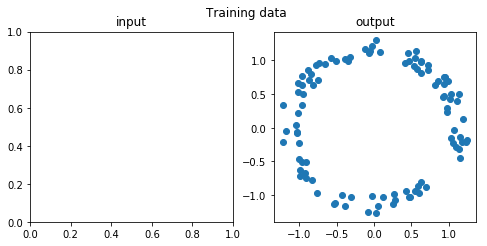

In [78]:
nobs = 100
x = torch.rand(nobs, n_in)
x_ = torch.rand(nobs, n_in)
y = npr.randn(nobs, n_out)
for i in range(nobs) :
    #y[i] = y[i]/10 + y[i]/np.linalg.norm(y[i])
    y[:,0] = list(np.cos(2*np.pi*x))*uniform.rvs(1,0.3,size=nobs)
    y[:,1] = list(np.sin(2*np.pi*x))*uniform.rvs(1,0.3,size=nobs)
y = torch.from_numpy(y).float()
    
plt.figure(figsize=(8,3.5))
plt.subplot(121)
# plt.plot(list(x[:,0]),list(x[:,1]), 'o')   
plt.title("input")
plt.subplot(122)
plt.plot(list(y[:,0]),list(y[:,1]), 'o')   
plt.title("output")
plt.suptitle("Training data");

#### Randomly initialise model weights:

In [72]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.uniform_(m.weight)
#         nn.init.normal_(m.weight)

# use the modules apply function to recursively apply the initialization
model.apply(init_normal)

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=2, bias=True)
)

In [73]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Optimize:

In [74]:
for epoch in range(100_000):
    # Forward Propagation
    y_pred = model(x)
    # Compute and print loss
    loss = criterion(y_pred, y)
    if (epoch+1)%20_000 == 0 :
        print('epoch: ', epoch+1,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()

epoch:  20000  loss:  0.09615728259086609
epoch:  40000  loss:  0.028161322697997093
epoch:  60000  loss:  0.012868563644587994
epoch:  80000  loss:  0.007658754475414753
epoch:  100000  loss:  0.0061315372586250305


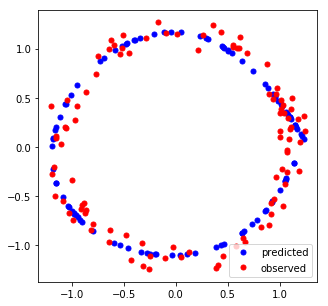

In [76]:
plt.figure(figsize=(5,5))
plt.plot(list(model(x)[:,0]),list(model(x)[:,1]), 'bo', label="predicted", markersize=5)
plt.plot(list(y[:,0]),list(y[:,1]), 'ro', label="observed", markersize=5)
plt.legend()